In [5]:
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
# For biological data

results,gt_intervals,gt_identities = [],[],[]

path_results = '../Code/datasets/data2/viterbi-intervals-data2-2.txt'
path_msa = '../Code/datasets/data2/data2-msa.fasta'
path_gt = '../Code/strain 17 annotations/17-cn.fasta'
path_gt_adjusted = '../Code/datasets/data2/17-cn-adjusted.fasta' # Adjust to include any gaps from MSA
'''
path_results = '../Code/datasets/test1/viterbi-intervals-test1.txt'
path_msa = '../Code/datasets/test1/test1-msa.fasta'
path_gt = '../Code/datasets/test1/test_bcdn.fasta'
path_gt_adjusted = '../Code/datasets/test1/test_bcdn-adjusted.fasta' # Adjust to include any gaps from MSA
'''
with open(path_results) as f:
    for line in f.readlines():
        nums = line.split(",")
        a,b = (int)(nums[0]),(int)(nums[1])
        results.append((a,b))
        
counter_msa = 0
counter_gt = 0

gt_lines = []
msa_lines = []
    
# Populating gt_lines
with open(path_gt) as f:
    for line in f.readlines():
        gt_lines.append(line.split("\n")[0])

# Populating msa_lines
with open(path_msa) as f:
    is_17 = False
    for line in f.readlines():
        if line.startswith(">JN555585.1"):
            is_17 = True
            continue
        if line.startswith(">"):
            is_17 = False
            break
        if is_17 == True:
            msa_lines.append(line)

gt_line_counter = 0
gt_char_counter = 0

adjusted_file = open(path_gt_adjusted,'w')

for line in msa_lines:
    msa_char_counter = 0
    while msa_char_counter < len(line):
        if line[msa_char_counter] == '\n':
            adjusted_file.write('\n')
        else:
            adjusted_file.write(gt_lines[gt_line_counter][gt_char_counter])
            if line[msa_char_counter] != '-':
                if gt_char_counter == len(gt_lines[gt_line_counter]) - 1:
                    gt_line_counter += 1
                    gt_char_counter = 0
                else:
                    gt_char_counter += 1
            
        msa_char_counter += 1

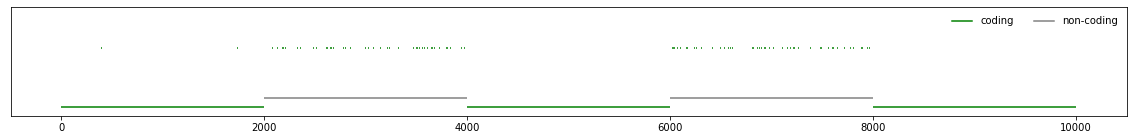

In [7]:
# For synthetic data

results,gt_intervals,gt_identities = [],[],[]

path_results = 'intervals.txt'
path_gt = 'testdata/test_bcdn.fasta'
path_gt_adjusted = 'testdata/test_bcdn.fasta'

with open(path_results) as f:
    for line in f.readlines():
        nums = line.split(",")
        a,b = (int)(nums[0]),(int)(nums[1])
        results.append((a,b))
        
with open(path_gt) as f:
    curr_identity = None
    cumulative_count = 1
    start = None
    
    for line in f.readlines():
        seq = line.split("\n")[0]
        
        counter = 0
        
        while counter < len(seq):
            if curr_identity == None:
                curr_identity = seq[counter]
                start = cumulative_count
                
            elif seq[counter] != curr_identity:
                gt_intervals.append((start,cumulative_count-1))
                gt_identities.append(curr_identity)
                
                curr_identity = seq[counter]
                start = cumulative_count
                
            counter += 1
            cumulative_count += 1
            
    gt_intervals.append((start,cumulative_count-1))
    gt_identities.append(curr_identity)

colors=['green','grey']
#labels=dict({'B':0,'C':0,'D':0,'N':1})
labels=dict({'C':0,'D':1})
identities = ['coding','non-coding']

fig,ax=plt.subplots(figsize=(20,2))
for interval in results:
    ax.hlines(.75,interval[0],interval[1],color=colors[0])
    
for i in range(len(gt_intervals)):
    identity = labels[gt_identities[i]]
    ax.hlines(.1+.1*identity,gt_intervals[i][0],gt_intervals[i][1],color=colors[identity])
ax.set_ylim(0,1.2)
#ax.set_xlim(-1,154000)

for i in range(len(colors)):
    ax.plot([],[],label=identities[i],color=colors[i])
    
ax.legend(frameon=False,ncol=4)
plt.yticks([])
plt.show()

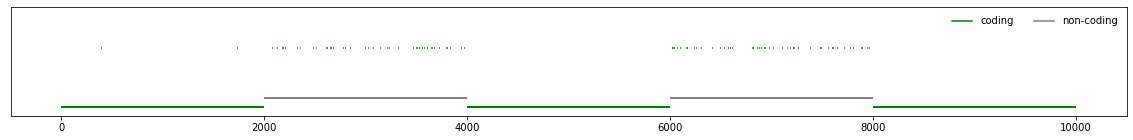

In [9]:
# Visually showing results

with open(path_gt_adjusted) as f:
    curr_identity = None
    cumulative_count = 1
    start = None
    
    for line in f.readlines():
        seq = line.split("\n")[0]
        
        counter = 0
        
        while counter < len(seq):
            if curr_identity == None:
                curr_identity = seq[counter]
                start = cumulative_count
                
            elif seq[counter] != curr_identity:
                gt_intervals.append((start,cumulative_count-1))
                gt_identities.append(curr_identity)
                
                curr_identity = seq[counter]
                start = cumulative_count
                
            counter += 1
            cumulative_count += 1
            
    gt_intervals.append((start,cumulative_count-1))
    gt_identities.append(curr_identity)

colors=['green','grey']
#labels=dict({'B':0,'C':0,'D':0,'N':1})
labels=dict({'C':0,'D':1})
identities = ['coding','non-coding']

fig,ax=plt.subplots(figsize=(20,2))
for interval in results:
    ax.hlines(.75,interval[0],interval[1],color=colors[0])
    
for i in range(len(gt_intervals)):
    identity = labels[gt_identities[i]]
    ax.hlines(.1+.1*identity,gt_intervals[i][0],gt_intervals[i][1],color=colors[identity])
ax.set_ylim(0,1.2)
#ax.set_xlim(-1,154000)

for i in range(len(colors)):
    ax.plot([],[],label=identities[i],color=colors[i])
    
ax.legend(frameon=False,ncol=4)
plt.yticks([])
plt.show()

In [10]:
# Calculating sensitivity, specificity, accuracy

tp,tn,fp,fn = 0,0,0,0
curr_results_interval = 0
curr_gt_interval = 0

for i in range(1,gt_intervals[-1][1]+1):
    
    if curr_results_interval < len(results)-1 and i == results[curr_results_interval+1][0]:
        curr_results_interval += 1
    if curr_gt_interval < len(gt_intervals)-1 and i == gt_intervals[curr_gt_interval+1][0]:
        curr_gt_interval += 1
        
    if i >= results[curr_results_interval][0] and i <= results[curr_results_interval][1]: # algo says coding
        if gt_identities[curr_gt_interval] == 'C':
            tp += 1
        else:
            fp += 1
    else: # algo says non-coding
        if gt_identities[curr_gt_interval] == 'C':
            fn += 1
        else:
            tn += 1

print(tp,fp,fn,tn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
accuracy = (tn+tp)/(tn+tp+fn+fp)

print(f'Sensitivity: {sensitivity}\nSpecificity: {specificity}\nAccuracy: {accuracy}')

21 1040 5979 2960
Sensitivity: 0.0035
Specificity: 0.74
Accuracy: 0.2981
